# Grade: /100 Mark(s)

# Assignment 02: Maximum Likelihood


### Maximum Likelihood

The exponential distribution https://en.wikipedia.org/wiki/Exponential_distribution is a continuous probability distribution often used to predict time when an event might ocurr, for instance Earthquake. 

If we know $y$ is influenced by feature $x$, then we can use the maximum likelihood principle to develop a regression model that estimates the mean of $Y$ given $X=x$.

In [1]:
# Packages for this assignment
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from sklearn.linear_model import LinearRegression


### Question 1: /10 Marks

The negative log likelihood for a exponential random variable is

$$\ell(\lambda; \mathbf{y}) = -\sum_{i=1}^N\Bigg(\ln(\lambda) - \lambda y_i \Bigg)$$

Here, $\mathbf{y}=(y_i) \in \mathbb{R^N}$ is a vector  and $\lambda$ is a scalar value.

Define a function called `exponentialNegLogLikelihood` that takes a vector  $\mathbf{y}$ and a parameter $\lambda$ and returns the negative log likelihood.

Test your function by calling it with `lamb = 2` and `y = np.array([1, 4, 6, 0])`.

Test your function by calling it with `lamb = np.array([1, 0.5, 2, 5])` and  `y = np.array([1.5, 2.1, 3.4, 0])`.

Answer in markdown:

* What happens when you set an element of lamb to 0 or a negative number. Why?

In [2]:
def exponentialNegLogLikelihood(lamb, y):
    neg_log_likelyhood = -np.sum(np.log(lamb)-lamb*y)
    return neg_log_likelyhood

lamb = 2
y = np.array([1, 4, 6, 0])
print( "Lamb = 2 y = [1,4,6,0] = "+str(exponentialNegLogLikelihood(lamb,y)))
print( "Lamb = [1, 0.5, 2, 5] y = [1.5, 2.1, 3.4, 0] = "+str(exponentialNegLogLikelihood(np.array([1, 0.5, 2, 5]),np.array([1.5, 2.1, 3.4, 0]))))

Lamb = 2 y = [1,4,6,0] = 19.227411277760222
Lamb = [1, 0.5, 2, 5] y = [1.5, 2.1, 3.4, 0] = 7.740562087565899


---
#### Question 1 Answer
Output:

Lamb = 2 y = [1,4,6,0] = 19.227411277760222
Lamb = [1, 0.5, 2, 5] y = [1.5, 2.1, 3.4, 0] = 7.740562087565899

When you set an element of lambda to zero we get an error because log functions are undefined at any value equal to zero it is undefined as it approaches infinity, and at any value thats negative is undefined


---

### Question 2: /15 Marks

Write a function called `exponentialRegressionNegLogLikelihood` that takes as arguments a vector $\mathbf{y}$ , a design matrix $\mathbf{X}$ of features, and a vector $\mathbf{\beta}$ of parameters. The function should return the negative log likelihood of this dataset, assuming that each element of  $\mathbf{y}$ is independent, and exponentially distributed with $\lambda=\exp(-\mathbf{X}\beta)$.

Test your function by calling it with 
* `b = np.array([1, 3])`
* `X = np.array([[1.4, 2.1, 3], [2.2, 3, 1.5]]).T`
* `y = np.array([0, 2.5, 10])`

In [3]:
def exponentialRegressionNegLogLikelihood(b, X, y):
    l = np.exp(-X@b)
    reg = exponentialNegLogLikelihood(l, y)
    return(reg)

exponentialRegressionNegLogLikelihood(np.array([1, 3]),np.array([[1.4, 2.1, 3], [2.2, 3, 1.5]]).T,np.array([0, 2.5, 10]))

26.60556862451103

### Question 3: /10 Marks

a) In `exponentialRegressionNegLogLikelihood`, what problem can happen if we assume that $\lambda = \mathbf{X}\beta$?.

This is due to the fact that when XB is used the density numbers are so small computers assume 0. This loss of preciscion makes it ineffictive in comparing different models.

b) What property of the exponential distribution is guaranteed when we assume that $\lambda$ has the form of $\exp(-\mathbf{X}\beta)$?:

Maximizing the log likelihood is the same as maximizing the likelehood,the log likelihood is summed instead of multiplied preventing the issues above.

No more than 2 lines for each answer.

### Question 4: /2.5 Marks

Define a function called `Prediction` whose arguments are a vector of coefficents $\beta$ and a design matrix $\mathbf{X}$, and its outputs are predictions of the form $\widehat{\mathbf{y}} = \exp(\mathbf{X}\beta)$. 

Test your function by calling it with 
* `b = np.array([1, 3])`
* `X = np.array([[1.4, 2.1, 3], [2.2, 3, 1.5]]).T`

In [4]:
def Prediction(b, X):
 
    pred = np.exp(X@b)
    return pred

Prediction(np.array([1, 3]), np.array([[1.4, 2.1, 3], [2.2, 3, 1.5]]).T)

array([ 2980.95798704, 66171.16016838,  1808.04241446])

### Question 5: /15 Marks

Define a function called `Model_fit` which accepts as its first argument a design matrix $\mathbf{X}$ and as its second argument a vector of $\mathbf{y}$. Its output should be the maximum likelihood estimates for the coefficients of exponential regression of $\mathbf{y}$ onto $\mathbf{X}$.

Test your function by calling it with 
* `X = np.array([[1.4, 2.1, 3], [2.2, 3, 1.5]]).T`
* `y = np.array([0, 2.5, 10])`

Write the estimated coefficient $b$.

In [5]:
def Model_fit(X, y):
    bstart = np.zeros(X.shape[-1])
    results = minimize(exponentialRegressionNegLogLikelihood,bstart ,(X,y), "Powell")
    return results.x

x = Model_fit(np.array([[1.4, 2.1, 3], [2.2, 3, 1.5]]).T,np.array([0, 2.5, 10]))
print("Estimated coefficient b = " + str(x))

Estimated coefficient b = [ 1.17119176 -0.72067184]


### Question 6: /2.5 Marks

Define a function called `Squared_residual` which accepts as its first argument a design matrix $\mathbf{X}$, its second argument a vector of $\mathbf{y}$ and its third argument a vector $\beta$. Its output should be squared residual of the exponential regression model. This residual is defined as 

$$
\text{squared-residual} = \dfrac{1}{n}\sum_i (y_i-\hat{y}_i)^2
$$

Test your function by calling it with 
* `X = np.array([[1.4, 2.1, 3], [2.2, 3, 1.5]]).T`
* `y = np.array([2980, 66171, 1808])`
* `b = np.array([1, 3])`


In [6]:
def Squared_residual(X,y,b):
    pred = Prediction(b, X)
    sqres = np.sum(np.square(y-pred))/len(y)
    return sqres

Squared_residual(np.array([[1.4, 2.1, 3], [2.2, 3, 1.5]]).T, np.array([2980, 66171, 1808]),  np.array([1, 3]))

0.315064022352556

### Question 7: /20 Mark(s)

Use the data `exponential_regression.csv`, where $y$ represents time units to fit a exponential regression using the functions that you already have created. 

* What are the estimated coefficients?
* Plot a scatterplot of the data that includes the model prediction over $x \in [-2.14, 2.14]$. Do not forget to include a graph title.
* Report the Squared residual in the plot

True


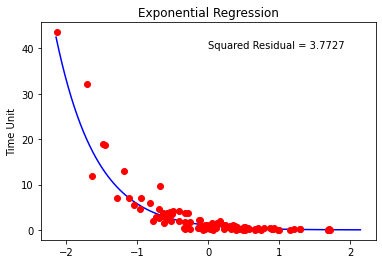

In [11]:
my_DF = pd.read_csv('/content/exponential_regression.csv', sep = ';')
y = my_DF['y'].to_numpy()
X = my_DF['x'].to_numpy()
tempX = np.linspace(-2.14,2.14,num = len(X))
predX = np.array([[i] for i in tempX])
X = np.array([[i] for i in X])


b = Model_fit(X,y)
predY = Prediction(b, predX)
sqres = Squared_residual(X,y,b)
plt.ylabel("Time Unit")
plt.title('Exponential Regression')
plt.annotate(("Squared Residual = " + str(sqres.round(4))), (0,40))
plt.plot(predX, predY, 'blue')
plt.plot(X,y, 'ro')
plt.show
predY[-1]
print(all(i >= 0 for i in predY))

### Question 8:  /10 Marks

Fit a linear regression (ordinary least squares) to the data, and obtain parameter estimates and and plot the predictions over the same range. Report the Squared residual in the plot


False


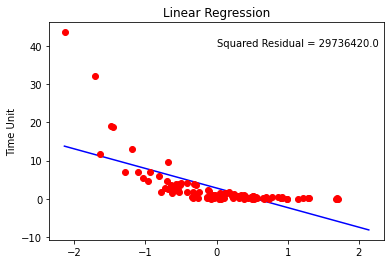

In [10]:
y = my_DF['y'].values
X = my_DF['x'].values.reshape(-1,1)
model = LinearRegression().fit(X,y)
predY = model.predict(predX)
sqres = Squared_residual(X,y,model.coef_)
model.score(X,y)
plt.ylabel("Time Unit")
plt.title('Linear Regression')
plt.annotate(("Squared Residual = " + str(sqres.round(0))), (0,40))
lnReg = plt.plot(predX, predY, 'blue')
plt.plot(X,y, 'ro')
plt.show
print(all(i >= 0 for i in predY))

### Question 9:  /10 Marks

Fit a linear regression (ordinary least squares) to the data with a square term, and obtain parameter estimates and and plot the predictions over the same range. Report the Squared residual in the plot.

Note that in this case the matrix X should look like 

$X =[[1,x_1,x_1^2],[1,x_2,x_2^2],...]$


False


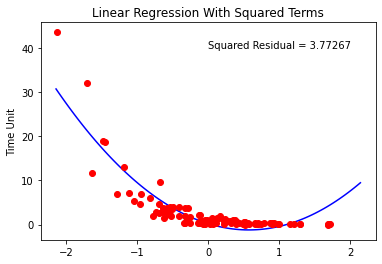

In [9]:
y = my_DF['y'].values
X = my_DF['x'].values.reshape(-1,1)
tempSqX = np.linspace(-2.14,2.14,num = len(X))
sqX = np.array([[1, i, i**2] for i in X], dtype=object)
predSqX = np.array([[1, i, i**2] for i in tempSqX])
model = LinearRegression().fit(sqX,y)
predY = model.predict(predSqX)
sqres = Squared_residual(X,y,b)
plt.ylabel("Time Unit")
plt.title('Linear Regression With Squared Terms')
plt.annotate(("Squared Residual = " + str(sqres.round(5))), (0,40))
plt.plot(predX, predY, 'blue')
plt.plot(X,y, 'ro')
lnReg
plt.show
print(all(i >= 0 for i in predY))

### Question 10: /5 Mark(s)

Between this three models which one would you select? What is the major problem with predictions from the other two models? Remember that in this case $y$ is measured in time units.

#### Answer

Between the three models i would select the first one primarily for one reason, the other two the X values go below zero which would not make sense in the context of Time as time can't go below zero. So some predictions are lost there while the first also remains above zero. Also the graph more closesly resemble with the first one. With the the second not even coming close, and the third making it curve up at the end 

### Follow These Instructions

Once you are finished, ensure to complete the following steps.

1.  Restart your kernel by clicking 'Kernel' > 'Restart & Run All'.

2.  Fix any errors which result from this.

3.  Repeat steps 1. and 2. until your notebook runs without errors.

4.  Submit your completed notebook to OWL by the deadline.